In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_velpt import Parser

In [3]:
# Coastal Endurance Oregon Shelf Surface Mooring Buoy (1 meters) VELPT data
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00003/cg_data/dcl11/velpt1/"
fname = "20160518.velpt1.log"

# initialize the Parser object for the VELPT (collects 1, 3-minute ensemble average every 15 minutes)
velpt = Parser(baseurl + fname)
r = requests.get(velpt.infile, verify=True) # use verify=False for expired certificate

In [4]:
velpt.raw = r.content
len(velpt.raw), velpt.raw[:4]

(8892, b'\xa5\x01\x15\x00')

In [5]:
velpt.parse_velocity()
velpt.parse_diagnostics()
velpt.data.keys()

Incorrect packet size
header data packet failed to parse


dict_keys(['diagnostics', 'velocity', 'header'])

In [6]:
velpt.data.velocity.time[:5]

[1463529600, 1463530500, 1463531400, 1463532300, 1463533200]

In [7]:
df = pd.DataFrame(velpt.data.velocity)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((96, 18), Index(['amplitude_beam1', 'amplitude_beam2', 'amplitude_beam3',
        'battery_voltage', 'date_time_array', 'error_code', 'heading', 'pitch',
        'pressure', 'roll', 'speed_of_sound', 'status_code', 'temperature',
        'time', 'velocity_east', 'velocity_north', 'velocity_vertical',
        'dt_utc'],
       dtype='object'))

In [9]:
df.dtypes

amplitude_beam1               int64
amplitude_beam2               int64
amplitude_beam3               int64
battery_voltage             float64
date_time_array              object
error_code                    int64
heading                     float64
pitch                       float64
pressure                    float64
roll                        float64
speed_of_sound              float64
status_code                   int64
temperature                 float64
time                          int64
velocity_east                 int64
velocity_north                int64
velocity_vertical             int64
dt_utc               datetime64[ns]
dtype: object

In [10]:
df.tail(5)

amplitude_beam1  amplitude_beam2  amplitude_beam3  \
dt_utc                                                                   
2016-05-18 22:45:00              157              158              157   
2016-05-18 23:00:00              160              161              160   
2016-05-18 23:15:00              158              160              158   
2016-05-18 23:30:00              161              163              161   
2016-05-18 23:45:00              160              161              160   

                     battery_voltage           date_time_array  error_code  \
dt_utc                                                                       
2016-05-18 22:45:00             11.7  [2016, 5, 18, 22, 45, 0]           0   
2016-05-18 23:00:00             11.6   [2016, 5, 18, 23, 0, 0]           0   
2016-05-18 23:15:00             11.7  [2016, 5, 18, 23, 15, 0]           0   
2016-05-18 23:30:00             11.7  [2016, 5, 18, 23, 30, 0]           0   
2016-05-18 23:45:00             11.7  [2016, 5, 18, 23, 45, 0]           0   

                     heading  pitch  pressure  roll  speed_of_sound  \
dt_utc                                                                
2016-05-18 22:45:00    339.8    3.1     1.797   0.7          1493.7   
2016-05-18 23:00:00    342.1    3.2     1.805   0.8          1493.3   
2016-05-18 23:15:00    342.4    2.9     1.800   0.9          1493.0   
2016-05-18 23:30:00    338.4    2.8     1.796   0.8          1493.2   
2016-05-18 23:45:00    353.6    2.6     1.813   1.3          1493.0   

                     status_code  temperature        time  velocity_east  \
dt_utc                                                                     
2016-05-18 22:45:00           33        11.80  1463611500            -82   
2016-05-18 23:00:00           33        11.70  1463612400           -139   
2016-05-18 23:15:00           33        11.62  1463613300           -133   
2016-05-18 23:30:00           33        11.66  1463614200           -112   
2016-05-18 23:45:00           33        11.59  1463615100           -128   

                     velocity_north  velocity_vertical              dt_utc  
dt_utc                                                                      
2016-05-18 22:45:00            -797               -246 2016-05-18 22:45:00  
2016-05-18 23:00:00            -766               -203 2016-05-18 23:00:00  
2016-05-18 23:15:00            -732               -222 2016-05-18 23:15:00  
2016-05-18 23:30:00            -696               -178 2016-05-18 23:30:00  
2016-05-18 23:45:00            -686               -231 2016-05-18 23:45:00

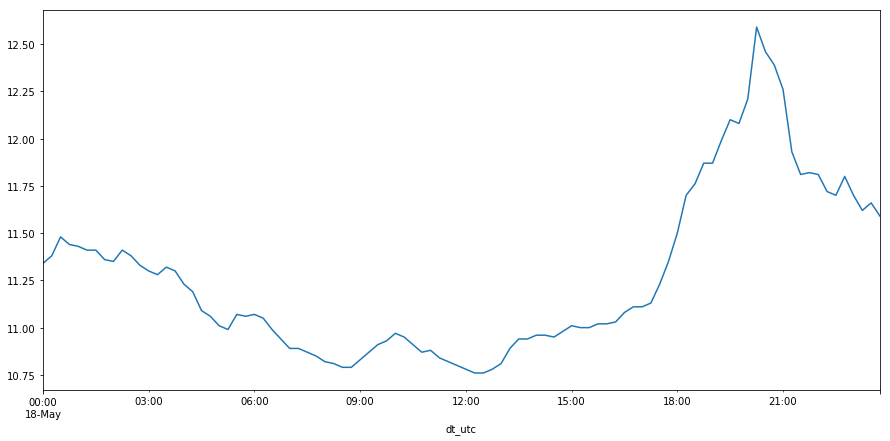

In [11]:
df['temperature'].plot(figsize=(15,7));

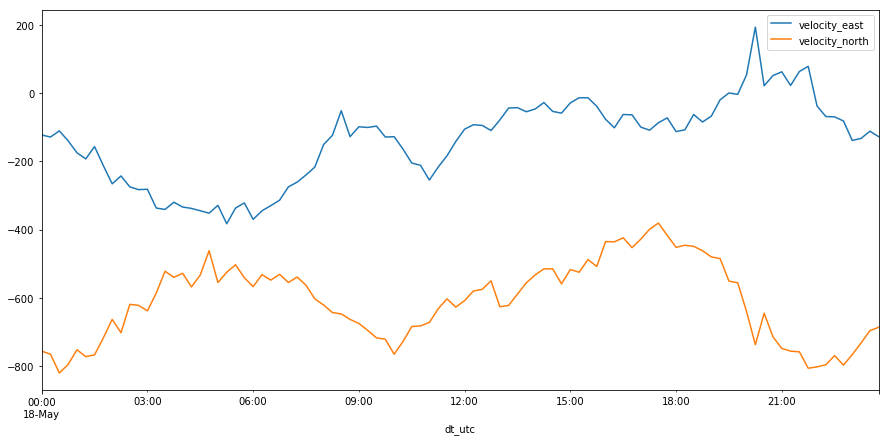

In [12]:
df[['velocity_east', 'velocity_north']].plot(figsize=(15,7));

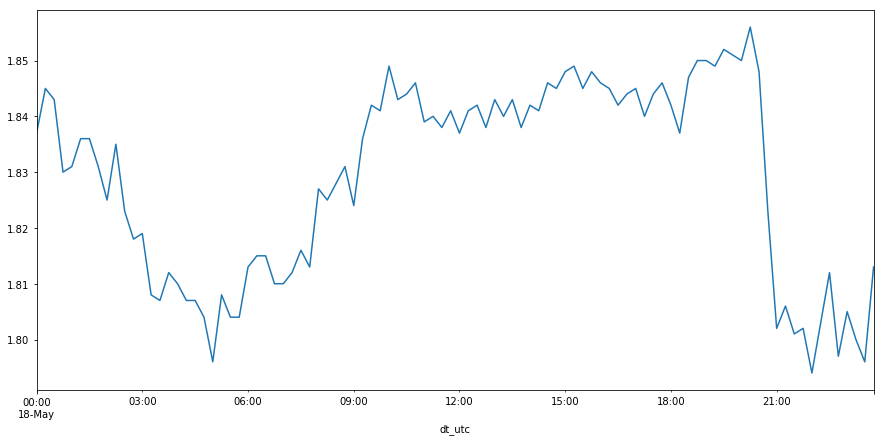

In [13]:
df['pressure'].plot(figsize=(15,7));

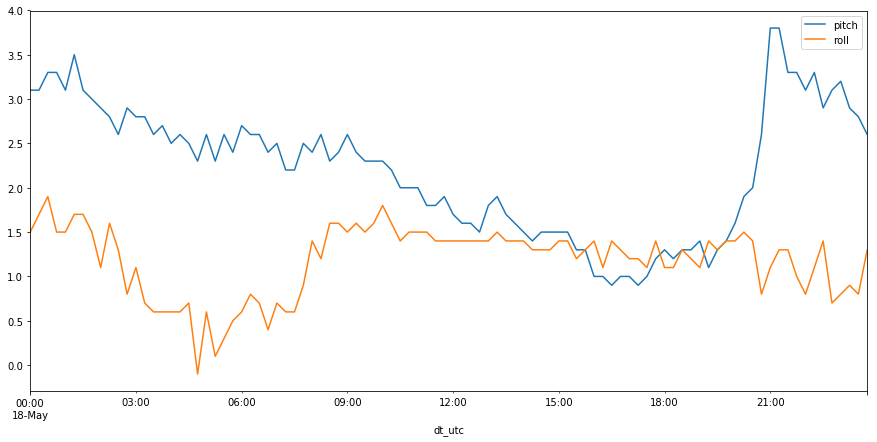

In [14]:
df[['pitch', 'roll']].plot(figsize=(15,7));

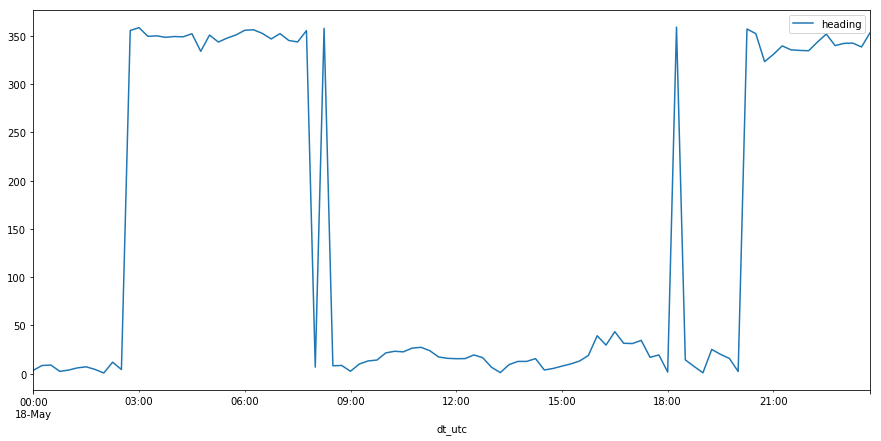

In [15]:
df[['heading']].plot(figsize=(15,7));